다중 클래스 분류(Multi-Class classification): 3개 이상의 선택지로부터 1개를 선택하는 문제

# 05-01 원-핫 인코딩(One-Hot Encoding)

## 1. 원-핫 인코딩(One-hot encoding)이란?

**원-핫 인코딩**: 선택해야하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현방법
- 여기서 차원은 벡터의 차원

원-핫 벡터(one-hot vector) : 원-핫 인코딩으로 표현된 벡터

# 05-02 소프트맥스 회귀(Softmax Regression) 이해하기

## 1. 다중 클래스 분류(Multi-class Classification)

## 2. 소프트맥스 함수(Softmax function)

# 05-03 소프트맥스 회귀 다양한 방법으로 구현하기

## 1. 소프트맥스 회귀의 비용함수 구현

In [17]:
import torch
import torch.nn.functional as F

In [18]:
torch.manual_seed(1)

### 1) 파이토치로 소프트맥스 비용함수 구현하기(로우-레벨)

In [19]:
z = torch.FloatTensor([1,2,3])  # 소프트맥스 함수의 입력

In [20]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [21]:
hypothesis.sum()

tensor(1.)

In [22]:
z = torch.rand(3, 5, requires_grad=True)    # torch.rand(low, high, requires_grad)

In [23]:
hypothesis = F.softmax(z, dim=1)    # 두번째 차원(열)에 대해서 소프트맥스 함수를 적용한다
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [24]:
y = torch.randint(5, (3,)).long()   # 0~4중 아무거나 선택해서 (3,) shape으로 만듦
print(y)

tensor([0, 2, 1])


In [30]:
# 모든 원소가 0의 값을 가진 3x5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1) # 첫번째 인자 dim=1에 대해서, 두번째 인자인 y_unsqueeze(1)이 알려주는 위치에, 세번째 인자 숫자 1을 넣음

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [31]:
print(y.unsqueeze(1))   # 두번째 차원에 대해서 1을 늘림

tensor([[0],
        [2],
        [1]])


In [33]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()   # dim=1 => 행방향
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 2) 파이토치로 소프트맥스의 비용 함수 구현하기(하이-레벨)

In [34]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [35]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [36]:
# Low Level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [37]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [38]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [39]:
# 네 번째 수식
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

## 2. 소프트맥스 회귀 구현하기

### 1) 데이터셋 준비

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [41]:
torch.manual_seed(1)

In [58]:
x_train = [[1, 2, 1, 1],
            [2, 1, 3, 2],
            [3, 1, 3, 4],
            [4, 1, 5, 5],
            [1, 7, 5, 5],
            [1, 2, 5, 6],
            [1, 6, 6, 6],
            [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

### 2) 소프트맥스 회귀 구현하기(로우-레벨)

In [59]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [62]:
y_one_hot= torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1),1)  # y_train.unsqueeze(1)의 인덱스에다가 1대입
print(y_one_hot.shape)

torch.Size([8, 3])


In [63]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True) # class 개수만큼\
#optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [64]:
nb_epochs = 1000
for epoch in range(nb_epochs+1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    #100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


### 3) 소프트맥스 회귀 구현하기(하이-레벨)

In [66]:
# 모델 초기화
W = torch.zeros((4, 3),requires_grad=True)
b = torch.zeros((1, 3), requires_grad = True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs=1000
for epoch in range(nb_epochs+1):

    # cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


### 4) 소프트맥스 회귀 nn.Module로 구현하기

In [67]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3
model = nn.Linear(4, 3)

In [68]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 20 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch   20/1000 Cost: 0.904600
Epoch   40/1000 Cost: 0.778017
Epoch   60/1000 Cost: 0.722806
Epoch   80/1000 Cost: 0.686341
Epoch  100/1000 Cost: 0.658891
Epoch  120/1000 Cost: 0.636713
Epoch  140/1000 Cost: 0.617946
Epoch  160/1000 Cost: 0.601539
Epoch  180/1000 Cost: 0.586845
Epoch  200/1000 Cost: 0.573443
Epoch  220/1000 Cost: 0.561047
Epoch  240/1000 Cost: 0.549451
Epoch  260/1000 Cost: 0.538507
Epoch  280/1000 Cost: 0.528102
Epoch  300/1000 Cost: 0.518151
Epoch  320/1000 Cost: 0.508587
Epoch  340/1000 Cost: 0.499357
Epoch  360/1000 Cost: 0.490416
Epoch  380/1000 Cost: 0.481729
Epoch  400/1000 Cost: 0.473265
Epoch  420/1000 Cost: 0.465000
Epoch  440/1000 Cost: 0.456911
Epoch  460/1000 Cost: 0.448979
Epoch  480/1000 Cost: 0.441186
Epoch  500/1000 Cost: 0.433516
Epoch  520/1000 Cost: 0.425956
Epoch  540/1000 Cost: 0.418493
Epoch  560/1000 Cost: 0.411114
Epoch  580/1000 Cost: 0.403807
Epoch  600/1000 Cost: 0.396563
Epoch  620/1000 Cost: 0.389370
Epoch  6

### 5) 소프트맥스 회귀 클래스로 구현하기

In [70]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)   # output이 3

    def forward(self, x):
        return self.linear(x)

In [71]:
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [72]:
nb_epochs = 1000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428280
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


# 05-04 소프트맥스 회귀로 MNIST 데이터 분류하기

## 3. 분류기 구현을 위한 사전 설정

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()    # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu")    # GPU 사용가능하면 사용하고 아니면 CPU 사용
print('다음 기기로 학습합니다:', device)

다음 기기로 학습합니다: cuda


In [3]:
# for reproducibility - 랜덤시드 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# hyperparameters
training_epochs = 15
batch_size=100

## 4. MNIST 분류기 구현하기

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.29MB/s]


In [6]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [7]:
# Mnist data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

In [8]:
# 비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)    # 내부적으로 소프트맥스함수를 포함하고 있음
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [9]:
for epoch in range(training_epochs):    # 앞서 training_epochs의 값은 15로 지정함
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch: ', '%04d' % (epoch+1), 'cost=','{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch:  0001 cost= 0.535150588
Epoch:  0002 cost= 0.359577715
Epoch:  0003 cost= 0.331264287
Epoch:  0004 cost= 0.316404670
Epoch:  0005 cost= 0.307106972
Epoch:  0006 cost= 0.300456554
Epoch:  0007 cost= 0.294933438
Epoch:  0008 cost= 0.290956199
Epoch:  0009 cost= 0.287074119
Epoch:  0010 cost= 0.284515619
Epoch:  0011 cost= 0.281914055
Epoch:  0012 cost= 0.279526889
Epoch:  0013 cost= 0.277636588
Epoch:  0014 cost= 0.275874794
Epoch:  0015 cost= 0.274422765
Learning finished


Accuracy: 0.8883000016212463
Label:  3
Prediction:  3


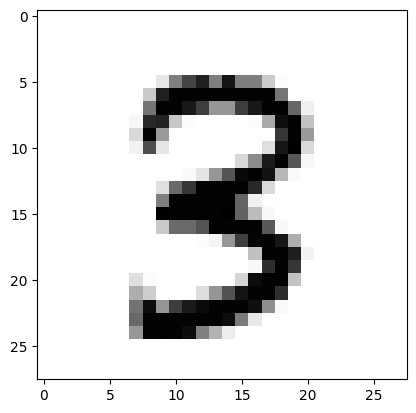

In [14]:
#  테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad():   # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test  # 행방향으로, 인덱스가 가장 큰 게 Y_test와 같다면 True
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다.
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ',torch.argmax(single_prediction, 1).item()) # 테스트시에는 소프트맥스 함수를 굳이 적용시키지 X. 제일 큰 값은 변하지 X

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys',
               interpolation='nearest')
    plt.show()